# Pymaceuticals Inc.
---

### Analysis : 

1. The bar graphs show that a lot more mice were tested on the Capomulin and Ramicane drug regimens compared to the other drug regimens.

2. The pie graphs the same percentage of male and female mice were tested. This will help produce  for more accurate results.

3. Based on the Tumor Volume and Drug Regimen Box plot, we can see that the drugs: Capomulin and Ramicane reduce tumors compared to Infubinol and Ceftamin.

4. Based on the scatter plot and line regression, there is a positive Correlation between Average Tumor volume and Weight. The correlation number is 0.84 and visually the scatter plot shows a positive upwards trend.

In [22]:
# Dependencies
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as st
from scipy.stats import linregress
%matplotlib notebook

In [23]:
# Data files paths
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Reading the files 
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Merging both file dataframes
study_data_merged_df = pd.merge(study_results_df, mouse_metadata_df,  how="left", on="Mouse ID")

# Printing
study_data_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [24]:
# Checking the number of mice.
mice_count = study_data_merged_df['Mouse ID'].nunique()
print(f'Number of mice: {mice_count}')

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_merged_df.loc[study_data_merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

Number of mice: 249


array(['g989'], dtype=object)

In [25]:
#Data for the duplicate mouse ID. Using isin for multiple subsets
duplicated_mice_df = study_data_merged_df.loc[study_data_merged_df['Mouse ID'].isin(duplicate_mice)]
duplicated_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Clean DataFrame excluding the duplicate mouse by its ID.
clean_data_df =  study_data_merged_df[study_data_merged_df['Mouse ID'] != 'g989']
clean_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data_df['Mouse ID'].nunique()
print(f'Number of mice in clean data: {clean_mice_count}')


Number of mice in clean data: 248


## Summary Statistics

In [28]:
# Summary statistics table for each regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume 

#groupying by 'Drug Regimen'
drug_regimen_index = clean_data_df.set_index('Drug Regimen').groupby('Drug Regimen')

#calculating the statistics
tumor_volume_mean = drug_regimen_index['Tumor Volume (mm3)'].mean()
tumor_volume_median = drug_regimen_index['Tumor Volume (mm3)'].median()
tumor_volume_variance = drug_regimen_index['Tumor Volume (mm3)'].var()
tumor_volume_std = drug_regimen_index['Tumor Volume (mm3)'].std()
tumor_volume_sem = drug_regimen_index['Tumor Volume (mm3)'].sem()


#datadrame
drug_regimen_df = pd.DataFrame({ 'Mean Tumor Volume' : tumor_volume_mean,
                                'Median Tumor Volume' : tumor_volume_median,
                                'Tumor Volume Variance' : tumor_volume_variance,
                                'Tumor Volume Std. Dev.' : tumor_volume_std,
                                'Tumor Volume Std. Err.' : tumor_volume_sem
                               })

drug_regimen_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Summary statistics table using the aggregation method

## The line below method will not show the 'Tumor Volume (mm3)' header
# DRUG_regimen_df = drug_regimen_index.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


#So used this method

DRUG_regimen_df = drug_regimen_index.agg(['mean', 'median', 'var', 'std', 'sem'], ['Tumor Volume (mm3)'])
del DRUG_regimen_df['Metastatic Sites']
del DRUG_regimen_df['Timepoint']
del DRUG_regimen_df['Age_months']
del DRUG_regimen_df['Weight (g)']
DRUG_regimen_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


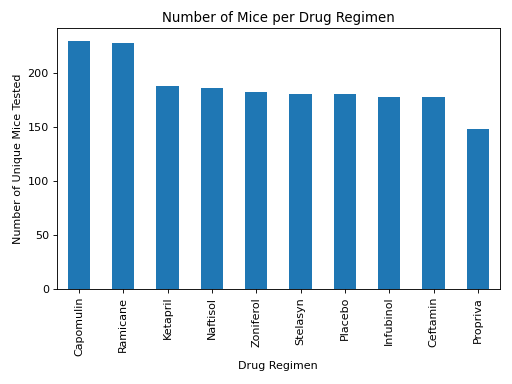

In [30]:
# Bar plot using pandas 
# total number of unique mice tested on each drug regimen

#mice count
mice_count_per_drug = clean_data_df.groupby(['Drug Regimen']).count()['Mouse ID'].sort_values(ascending = False) 


mice_treated_pandas = mice_count_per_drug.plot(kind='bar', fontsize = 10, sort_columns=True)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.title('Number of Mice per Drug Regimen')
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


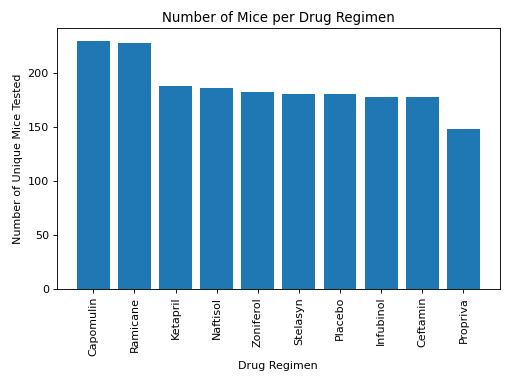

In [31]:
# Bar plot using pyplot
# total number of unique mice tested on each drug regimen

#count of drug regimens  for x-axis
x_axis = np.arange(len(mice_count_per_drug))

#plotting
plt.bar(x_axis,mice_count_per_drug)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, 
           ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
            'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], 
           rotation = 'vertical')



plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.title('Number of Mice per Drug Regimen')
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


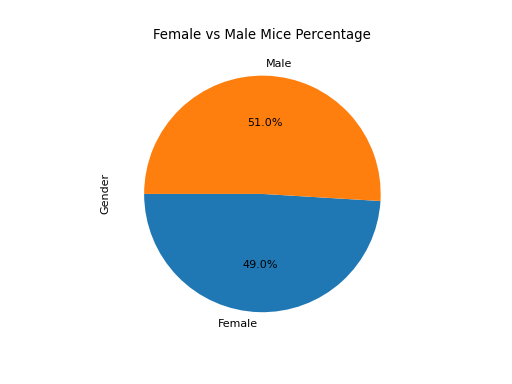

In [32]:
# Pie plot using pandas 
# Distribution of female versus male mice 

#grouping by gender
mice_gender = clean_data_df.groupby(['Sex']).count()['Mouse ID']

#plotting
mice_gender_pandas = mice_gender.plot(kind='pie', autopct="%1.1f%%", startangle=180)
plt.title('Female vs Male Mice Percentage')
plt.ylabel('Gender')
plt.show()


<IPython.core.display.Javascript object>


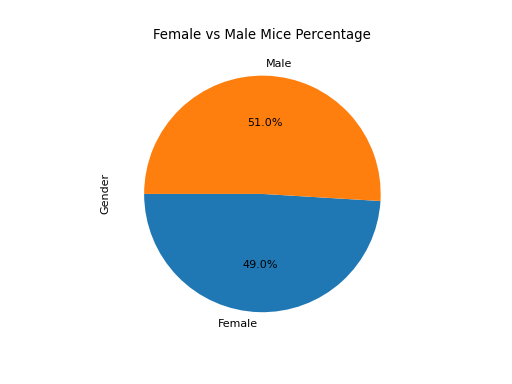

In [33]:
# Pie plot using pyplot
# Distribution of female versus male mice 

labels= ['Female', 'Male']

#plotting
plt.pie(mice_gender, labels=labels, autopct="%1.1f%%", startangle=180)
plt.title('Female vs Male Mice Percentage')
plt.ylabel('Gender')
plt.show()


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#getting last (greatest) timpoint per drug per mouse
Capomulin = clean_data_df.loc[clean_data_df['Drug Regimen'] ==  'Capomulin']
Ramicane = clean_data_df.loc[clean_data_df['Drug Regimen'] ==  'Ramicane'] 
Infubinol = clean_data_df.loc[clean_data_df['Drug Regimen'] ==  'Infubinol'] 
Ceftamin = clean_data_df.loc[clean_data_df['Drug Regimen'] ==  'Ceftamin'] 

Capomulin_timepoint = clean_data_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_timepoint = clean_data_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_timepoint = clean_data_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_timepoint = clean_data_df.groupby('Mouse ID').max()['Timepoint']



#merging columns to get the tumor volume at the last timepoint
merged_data_cap_df = pd.merge(Capomulin_timepoint, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_data_ram_df = pd.merge(merged_data_cap_df, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_data_infu_df = pd.merge(merged_data_ram_df, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_data = pd.merge(merged_data_infu_df, clean_data_df, on=['Mouse ID', 'Timepoint'], how='left')



#deleting duplicate columns
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]
merged_data = merged_data.drop(['Weight (g)_y', 'Age_months_y', 'Sex_y', 'Drug Regimen_y', 'Metastatic Sites_y',
                  'Tumor Volume (mm3)_y'], axis = 1)
#renmaing columns
merged_data = merged_data.rename(columns = {'Tumor Volume (mm3)_x' : 'Tumor Volume (mm3)', 
                                            'Metastatic Sites_x' : 'Metastatic Sites',
                                            'Drug Regimen_x' : 'Drug Regimen', 
                                            'Sex_x' : 'Sex',
                                            'Age_months_x' : 'Age_months',
                                            'Weight (g)_x' : 'Weight (g)'
                                           })


#printing
merged_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [35]:
################## NOTE ###############
# Code in this block is given to us by the professor
#######################################

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

    
################ END BLOCK ################

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


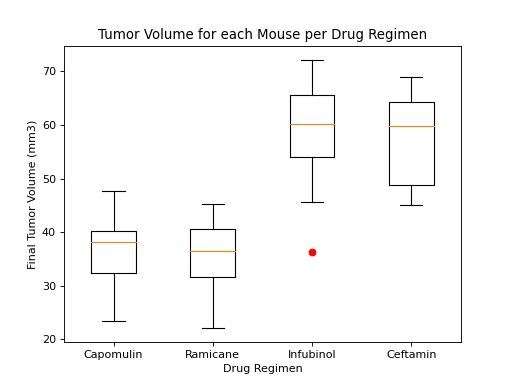

In [36]:
# Box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels = treatment_list , sym='r')
plt.title('Tumor Volume for each Mouse per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


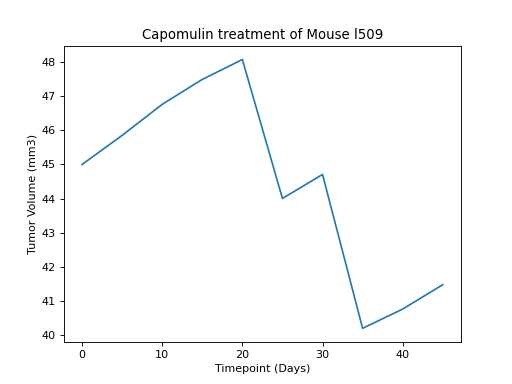

In [37]:
# line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis_line = clean_data_df.loc[clean_data_df['Mouse ID'] == 'l509']['Timepoint']
y_axis_line = clean_data_df.loc[clean_data_df['Mouse ID'] == 'l509']['Tumor Volume (mm3)']

plt.plot(x_axis_line, y_axis_line)
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<IPython.core.display.Javascript object>


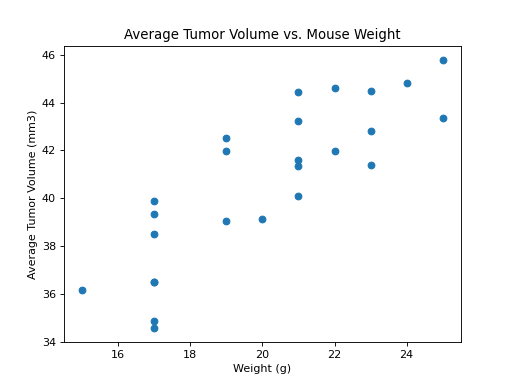

In [38]:
# Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
                                                       
x_axis_scat = Capomulin.groupby(['Mouse ID']).mean()['Weight (g)']
y_axis_scat = Capomulin.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

plt.scatter(x_axis_scat, y_axis_scat)

plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [39]:
# Correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = round(st.pearsonr(x_axis_scat,y_axis_scat)[0], 2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')


The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


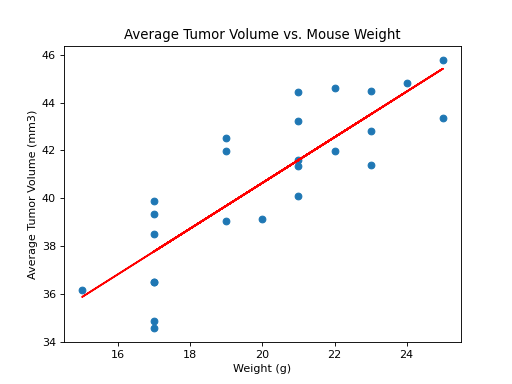

In [40]:
# Adding  linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scat, y_axis_scat)
regress_values = x_axis_scat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.scatter(x_axis_scat, y_axis_scat)
plt.plot(x_axis_scat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
